In [3]:
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
from sklearn.calibration import LabelEncoder


In [5]:
wine = pd.read_csv('train.csv', index_col=0)
lbl = LabelEncoder()
wine['quality'] = lbl.fit_transform(wine['quality'])

X = wine.drop('quality', axis=1)
y = wine['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=23, stratify=y)


In [31]:
dtc = DecisionTreeClassifier(random_state=23, max_depth=None)
dtc.fit(X, y)

DecisionTreeClassifier(random_state=23)

In [32]:
from sklearn.metrics import log_loss


y_pred = dtc.predict(X_test)
y_pred_proba = dtc.predict_proba(X_test)
print(log_loss(y_test, y_pred_proba))

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- Id


Creating a graphical view of tree

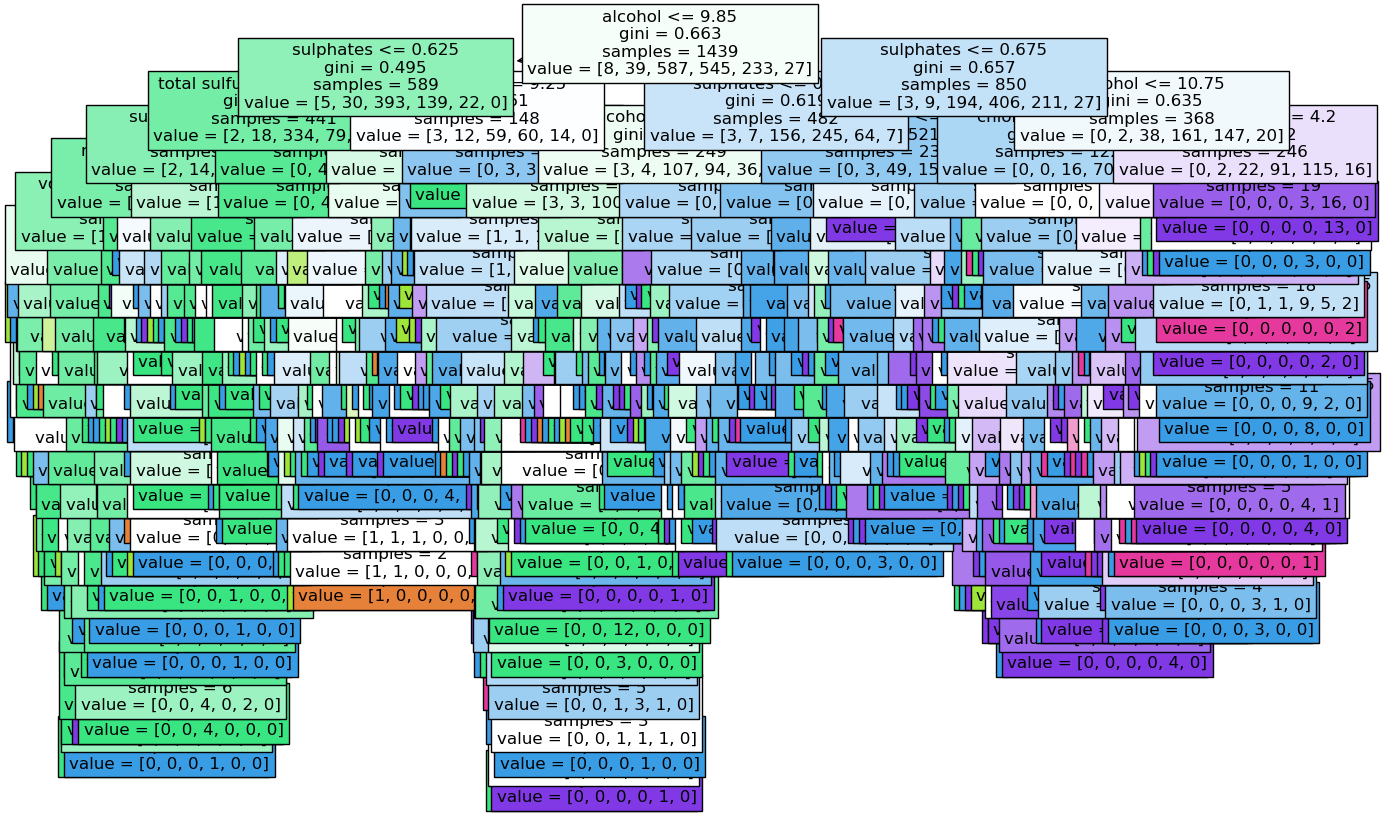

In [30]:
# plt.figure(figsize=(15,10))
# plot_tree(dtc, feature_names=X_train.columns, filled=True, fontsize=12)
# plt.show()

In [11]:
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=23)
params = {'max_depth':[2,3,4,5,6,7,8,9,10,None]}
gcv = GridSearchCV(dtc, param_grid=params, cv=kfold, n_jobs=4, scoring='neg_log_loss')
gcv.fit(X,y)
print(gcv.best_params_)
print(gcv.best_score_)

{'max_depth': 5}
0.5685859731178986


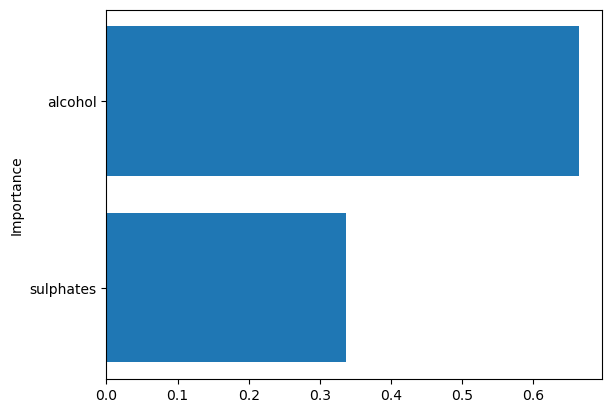

In [9]:
best_model = gcv.best_estimator_

df_imp = pd.DataFrame({'variable':best_model.feature_names_in_, 'importance':best_model.feature_importances_})
df_imp = df_imp[df_imp['importance']>0.0001]
df_imp.sort_values(by='importance',ascending=False)
plt.barh(df_imp['variable'],df_imp['importance'])
plt.ylabel('Importance')
plt.show()

In [26]:
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=23)
params = {'max_depth':[2,3,4,5,6,7,8,9,10,None],'min_samples_split':[2,3,4,5,6,7,8,9,10],'min_samples_leaf':np.arange(1,16)}
gcv = GridSearchCV(dtc, param_grid=params, cv=kfold, n_jobs=4, scoring='neg_log_loss')
gcv.fit(X,y)
print(gcv.best_params_)
print(gcv.best_score_)

{'max_depth': 5, 'min_samples_leaf': 9, 'min_samples_split': 2}
0.5758840620792289


In [ ]:
test = pd.read_csv('test.csv')
bm = gcv.best_estimator_
y_pred = bm.predict(X_test.iloc[:,1:])
print(y_pred)
submit = pd.DataFrame({'Id':X_test.Id,'quality':y_pred})
submit.to_csv('submission_for_Tabular_Wine_Quality_Dataset.csv',index=False)

In [27]:
from sklearn.linear_model import LogisticRegression


kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=23)
lr = LogisticRegression()

penalty = ['l1','l2',None]
solver = ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']

params = {'penalty':penalty,'multi_class':['multinomial']}
gcv = GridSearchCV(lr,param_grid=params,cv=kfold, verbose = 3,n_jobs= -1, scoring='neg_log_loss')
gcv.fit(X,y)
print(gcv.best_params_)
print(gcv.best_score_)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV 1/5] END .multi_class=multinomial, penalty=l1;, score=nan total time=   0.0s
[CV 2/5] END .multi_class=multinomial, penalty=l1;, score=nan total time=   0.0s
[CV 3/5] END .multi_class=multinomial, penalty=l1;, score=nan total time=   0.0s
[CV 4/5] END .multi_class=multinomial, penalty=l1;, score=nan total time=   0.0s
[CV 5/5] END .multi_class=multinomial, penalty=l1;, score=nan total time=   0.0s


/home/dai/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/dai/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

[CV 1/5] END multi_class=multinomial, penalty=l2;, score=0.536 total time=   0.2s
[CV 3/5] END multi_class=multinomial, penalty=l2;, score=0.547 total time=   0.2s
[CV 2/5] END multi_class=multinomial, penalty=None;, score=0.540 total time=   0.1s
[CV 4/5] END multi_class=multinomial, penalty=l2;, score=0.569 total time=   0.1s
[CV 4/5] END multi_class=multinomial, penalty=None;, score=0.562 total time=   0.2s
[CV 2/5] END multi_class=multinomial, penalty=l2;, score=0.535 total time=   0.2s
[CV 1/5] END multi_class=multinomial, penalty=None;, score=0.527 total time=   0.2s
[CV 3/5] END multi_class=multinomial, penalty=None;, score=0.557 total time=   0.1s
[CV 5/5] END multi_class=multinomial, penalty=l2;, score=0.547 total time=   0.2s
[CV 5/5] END multi_class=multinomial, penalty=None;, score=0.555 total time=   0.2s
{'multi_class': 'multinomial', 'penalty': None}
0.5481621902534666


/home/dai/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/dai/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
5 fits failed out of a total of 15.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the followin

In [28]:
bm = gcv.best_estimator_
y_pred = bm.predict(X_test.iloc[:,1:])
print(y_pred)
submit = pd.DataFrame({'Id':X_test.Id,'quality':y_pred})
submit.to_csv('submission_for_Tabular_Wine_Quality_Dataset_using_LG.csv',index=False)

[2 2 3 ... 2 2 2]


In [6]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
kfold =StratifiedKFold(n_splits=5, shuffle=True, random_state=23)

scaler = MinMaxScaler()
svm = SVC(kernel='rbf', probability=True, random_state=23)
pipe = Pipeline([('SCL',scaler),('SVM',svm)])
kernel = ['rbf','linear']
params = {'SVM__C':np.linspace(0.001,5,5),'SVM__kernel':kernel, 'SVM__decision_function_shape':['ovo', 'ovr'],'SVM__gamma':np.linspace(0.001,5,5)}
rgcv = GridSearchCV(pipe, param_grid=params, cv=kfold, verbose=3,n_jobs=8,  scoring='neg_log_loss')
rgcv.fit(X,y)
print(rgcv.best_params_)
print(rgcv.best_score_)
best_MM_rbf = rgcv.best_estimator_

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV 3/5] END SVM__C=0.001, SVM__decision_function_shape=ovo, SVM__gamma=0.001, SVM__kernel=linear;, score=-1.094 total time=   1.1s
[CV 1/5] END SVM__C=0.001, SVM__decision_function_shape=ovo, SVM__gamma=0.001, SVM__kernel=linear;, score=-1.116 total time=   1.1s
[CV 2/5] END SVM__C=0.001, SVM__decision_function_shape=ovo, SVM__gamma=0.001, SVM__kernel=linear;, score=-1.060 total time=   1.1s
[CV 3/5] END SVM__C=0.001, SVM__decision_function_shape=ovo, SVM__gamma=0.001, SVM__kernel=rbf;, score=-1.156 total time=   1.6s
[CV 1/5] END SVM__C=0.001, SVM__decision_function_shape=ovo, SVM__gamma=0.001, SVM__kernel=rbf;, score=-1.221 total time=   1.6s
[CV 4/5] END SVM__C=0.001, SVM__decision_function_shape=ovo, SVM__gamma=0.001, SVM__kernel=rbf;, score=-1.117 total time=   1.7s
[CV 2/5] END SVM__C=0.001, SVM__decision_function_shape=ovo, SVM__gamma=0.001, SVM__kernel=rbf;, score=-1.110 total time=   1.8s
[CV 5/5] END SVM__C=0.001

In [4]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
kfold =StratifiedKFold(n_splits=5, shuffle=True, random_state=23)

scaler = MinMaxScaler()
svm = SVC(kernel='rbf', probability=True, random_state=23)
pipe = Pipeline([('SCL',scaler),('SVM',svm)])
kernel = ['rbf','linear']
params = {'SVM__C':np.linspace(0.001,5,5),'SVM__kernel':kernel, 'SVM__decision_function_shape':['ovo', 'ovr'],'SVM__gamma':np.linspace(0.001,5,5)}
rgcv = RandomizedSearchCV(pipe, param_distributions=params, cv=kfold, verbose=3, random_state=23,  scoring='neg_log_loss')
rgcv.fit(X,y)
print(rgcv.best_params_)
print(rgcv.best_score_)
best_MM_rbf = rgcv.best_estimator_

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END SVM__C=1.2507499999999998, SVM__decision_function_shape=ovo, SVM__gamma=3.75025, SVM__kernel=rbf;, score=-1.066 total time=   1.8s
[CV 2/5] END SVM__C=1.2507499999999998, SVM__decision_function_shape=ovo, SVM__gamma=3.75025, SVM__kernel=rbf;, score=-1.046 total time=   1.6s
[CV 3/5] END SVM__C=1.2507499999999998, SVM__decision_function_shape=ovo, SVM__gamma=3.75025, SVM__kernel=rbf;, score=-1.035 total time=   1.5s
[CV 4/5] END SVM__C=1.2507499999999998, SVM__decision_function_shape=ovo, SVM__gamma=3.75025, SVM__kernel=rbf;, score=-1.030 total time=   1.6s
[CV 5/5] END SVM__C=1.2507499999999998, SVM__decision_function_shape=ovo, SVM__gamma=3.75025, SVM__kernel=rbf;, score=-1.036 total time=   1.6s
[CV 1/5] END SVM__C=5.0, SVM__decision_function_shape=ovo, SVM__gamma=0.001, SVM__kernel=rbf;, score=-1.116 total time=   1.5s
[CV 2/5] END SVM__C=5.0, SVM__decision_function_shape=ovo, SVM__gamma=0.001, SVM__kernel=rbf